In [1]:
# made by 도날드원

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# csv 전체 title
whole_Data_Title=['color', 'director_name', 'num_critic_for_reviews', 'duration',
            'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name','actor_1_facebook_likes',
            'gross','genres', 'actor_1_name', 'movie_title', 'num_voted_users','cast_total_facebook_likes',
            'actor_3_name','facenumber_in_poster', 'plot_keywords', 'movie_imdb_link','num_user_for_reviews',
            'language','country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
            'imdb_score	aspect_ratio','movie_facebook_likes']

# 사용할 title
data_Title=['num_critic_for_reviews', 'duration','director_facebook_likes','actor_3_facebook_likes',
              'actor_1_facebook_likes', 'gross','num_voted_users','cast_total_facebook_likes',
              'facenumber_in_poster','num_user_for_reviews','content_rating','budget','actor_2_facebook_likes','imdb_score',
              'aspect_ratio','movie_facebook_likes']

# csv 읽기
whole_Movie_Data = pd.read_csv('resources/movie_metadata.csv')
# content rating의 값에 대해서 set
index = list(set(whole_Movie_Data['content_rating'].values.tolist()))

# content rating값들의 사전화
# content rating의 set 값을 key로, 0부터 index를 값으로 만듬
content_rating_index = {}
for i, idx in enumerate(index):
    content_rating_index[idx] = i

# content_rating_index를 기반으로 값을 재구성하기 위한 함수
def setIdToValue(value):
    ret = content_rating_index[value]
    return ret

# content_rating의 값을 index로 변경
whole_Movie_Data['content_rating']=whole_Movie_Data['content_rating'].apply(setIdToValue)

# 사용할 title로만 다시 데이터를 만듬
MovieData=whole_Movie_Data[data_Title]

# 데이터 확인
print(whole_Movie_Data.head())
print(MovieData.head(1))

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0 

In [3]:
# Positive 데이터
Positive_Th=5

# 전체 데이터 중에서 MovieData의 imdb_score가 Positive Threthold보다 큰 데이터만 확보
Pos_Data=whole_Movie_Data[MovieData['imdb_score']>Positive_Th]
# 전체 데이터 중에서 MovieData의 imdb_score가 Positive Threthold보다 작은 데이터만 확보
Neg_Data=whole_Movie_Data[MovieData['imdb_score']<=Positive_Th]

# 사용할 데이터의 필드 수
num_item=len(data_Title)
print(num_item)

16


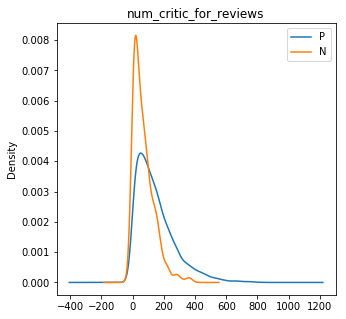

In [10]:
fig=plt.figure(figsize=(5,5))
fig.add_subplot(1,1,1)
Pos_Data[data_Title[0]].plot(kind='kde')
Neg_Data[data_Title[0]].plot(kind='kde')
plt.legend(['P','N'])
plt.title(data_Title[0])
plt.show()

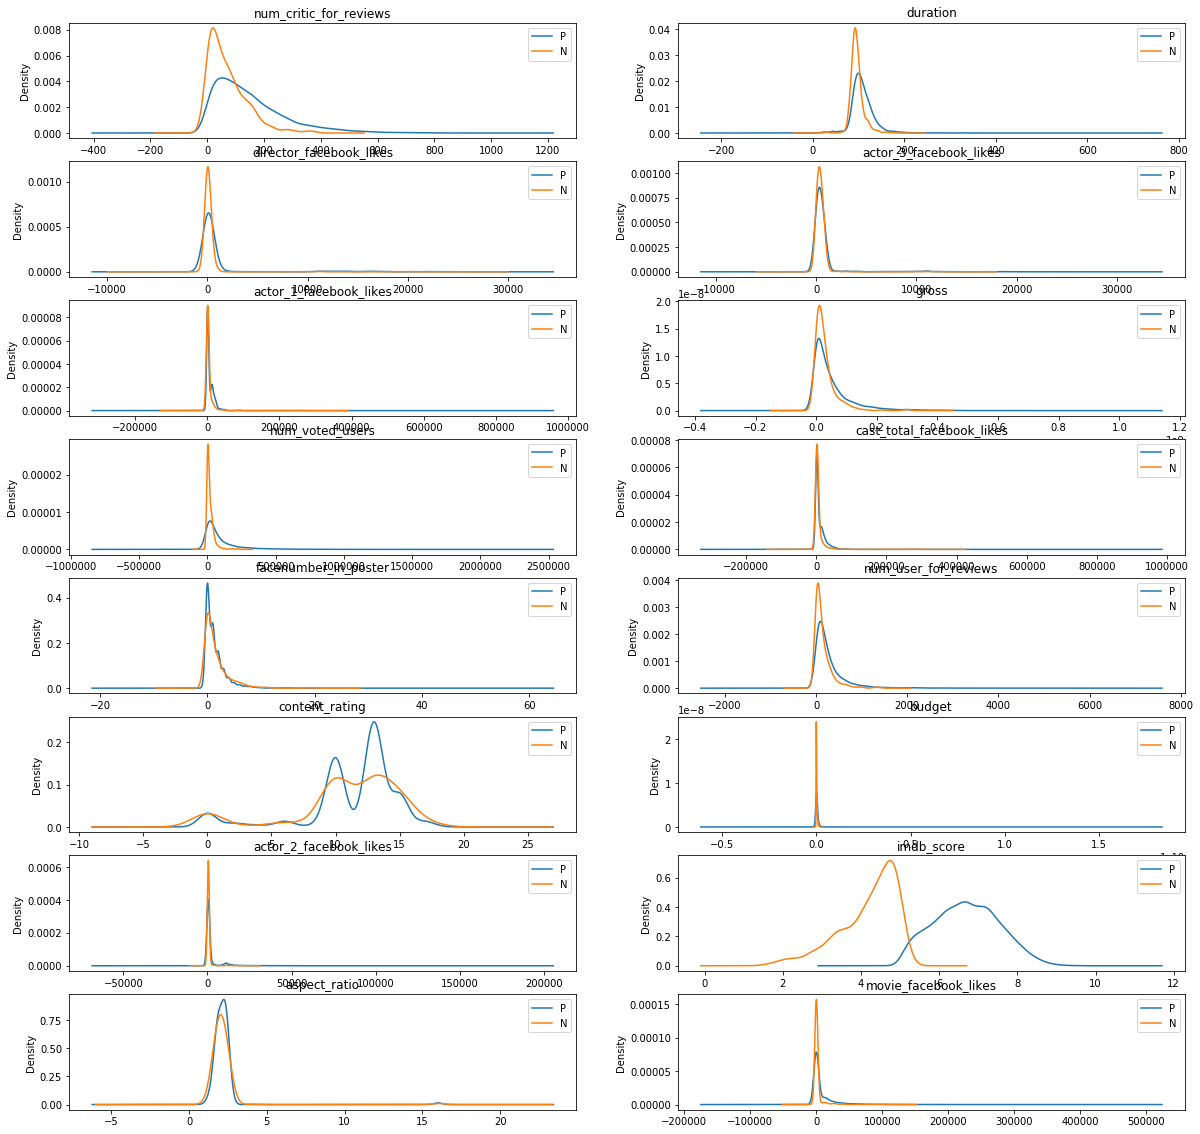

In [8]:
fig=plt.figure(figsize=(20,20))
num_col=2
num_row= num_item/num_col
if num_item%num_col:
    num_row+=1

for i in range(num_item):
    fig.add_subplot(num_row,num_col,i+1)
    Pos_Data[data_Title[i]].plot(kind='kde')
    Neg_Data[data_Title[i]].plot(kind='kde')
    plt.legend(['P','N'])
    plt.title(data_Title[i])

plt.show()

In [ ]:
plt.figure(figsize=(2,2))

def sigmoid(t):
    return (1/(1+np.e**(-t)))

plot_range=np.arange(-6,6,0.1)

y=sigmoid(plot_range)
plt.plot(plot_range, y, color="red")